In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

%matplotlib inline 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



In [2]:
df = pd.read_csv('주택유형별_주택거래현황_20220401101043.csv', encoding='utf-8')
#df.drop([0])
df = df [ df['유형별(2)'] == '소계' ]

df = df.iloc[:, list(range(0, 4)) + list(range(4, 51, 2))]

df.drop(['행정구역별(1)', '유형별(1)', '유형별(2)'], axis = 1, inplace = True)

df.rename(columns = {'행정구역별(2)' : '구'}, inplace = True)

# df.head()

df.set_index('구', inplace = True)
df = df.astype(int)
df.head()
df.rename(columns = {'2020.1' : '2020.10', '2021.1':'2021.10'}, inplace = True)

In [3]:
df2 = df.copy()
df2['2020년'] = 0
df2['2021년'] = 0

for month in range(1, 13, 1):
    df2['2020년'] += df2['2020.{}'.format(str(month).zfill(2))]
for month in range(1, 13, 1):
    df2['2021년'] += df2['2021.{}'.format(str(month).zfill(2))]

df2['증감율'] = (df2['2021년'] - df2['2020년']) / df2['2020년'] * 100

df2['증감율'] = df2['증감율'].astype(int)

df2

,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,...,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12,2020년,2021년,증감율
구,,,,,,,,,,,,,,,,,,,,,
종로구,356,299,270,173,206,273,500,315,198,184,...,209,229,187,209,232,189,223,3284,2770,-15
중구,317,251,185,116,139,247,452,432,550,223,...,165,369,214,139,125,78,566,3399,2626,-22
용산구,958,760,461,461,1059,598,1030,509,362,335,...,416,407,426,379,280,280,279,7622,4977,-34
성동구,596,549,465,280,241,542,1808,520,375,196,...,259,281,262,248,257,173,208,6644,3909,-41
광진구,524,468,506,383,393,556,907,682,901,392,...,555,410,417,384,422,314,335,6832,6305,-7
동대문구,1058,1322,914,479,553,783,1316,1156,590,470,...,514,438,434,338,321,297,392,9684,5663,-41
중랑구,552,855,1018,627,614,790,1170,754,798,610,...,757,606,461,564,603,467,409,8932,7543,-15
성북구,1256,1350,1513,710,696,1117,1758,981,998,827,...,725,638,708,764,467,454,485,12702,8743,-31
강북구,868,757,837,609,656,934,1241,655,578,722,...,631,585,522,458,432,344,315,9087,6856,-24


In [4]:
from scipy import stats

year_sum_data = pd.read_excel('커뮤니티_조회수합산.xlsx')
year_sum_data.set_index('월', inplace = True)
year_sum_data = year_sum_data.T
year_sum_data

year_average_data = pd.read_excel('커뮤니티_평균_조회수.xlsx')
year_average_data = year_average_data.rename(columns = {'Unnamed: 0' : '구'}).set_index('구')
year_average_data

month_sum_data = pd.read_excel('월별_커뮤니티_합계.xlsx')
month_sum_data = month_sum_data.set_index('월').T
month_sum_data.head()

월,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12
강남구,28581.516129,22225.254545,29188.250000,21646.984848,16784.697561,25183.347222,38033.424870,19417.965517,9915.000000,12826.486111,...,6439.480000,6613.363636,8048.405797,4142.861111,4944.050725,7538.474860,2152.700855,5462.477941,10096.336207,2537.080000
강동구,22751.705882,18663.673913,25084.636364,24290.428571,15205.500000,64178.452055,37513.848889,36930.576271,23003.443478,30374.245283,...,37203.954128,13330.084906,6228.876033,13579.490909,22641.222222,16088.637255,45317.732143,21801.723881,10990.861314,8814.259887
강북구,8614.812500,2198.190476,3388.259259,2859.642857,4172.818182,4718.964286,7585.955556,6477.740741,5194.090909,5848.680000,...,4474.900000,2141.153846,1917.958333,990.090909,2960.062500,1699.200000,2778.250000,1696.281250,2930.307692,1431.631579
강서구,45964.457447,65550.348624,85916.630137,12804.271429,26971.394737,31461.337423,27054.951691,27783.425806,13430.928058,17503.025974,...,5722.701031,10564.410256,7149.053191,10469.160584,17760.523179,26657.589744,22951.803150,14214.363636,5862.020000,5266.426667
관악구,6084.863636,12909.811594,11988.109375,4554.307692,4636.116667,7324.152672,4379.387755,3258.899083,4198.514851,5473.670886,...,4359.471429,4198.192308,4148.350000,1535.846154,2139.198473,2743.509804,1701.703297,3513.871795,2305.821782,1735.679487


<Figure size 720x720 with 0 Axes>

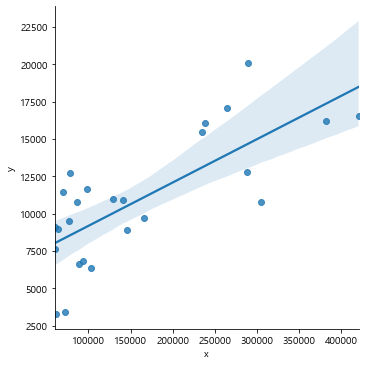

(0.7458767808274971, 1.8702291559923833e-05)

In [6]:
# 2020년의 조회수 합산와 거래량의 상관계수

x1 = year_sum_data['2020년도'] # 조회수
x1.index.name = '구'   
x2 = df2['2020년'].copy() # 거래량
x2.sort_index(inplace = True)

corr_frame =  pd.DataFrame({'x': x1, 'y' : x2})

plt.figure(figsize=(10,10))
sns.lmplot(x = 'x', y = 'y', data = corr_frame, ci = 95)
plt.show()

stats.pearsonr(x1, x2)  
# (0.7458767808274971, 1.8702291559923833e-05) # 깔끔하게 통과 # 총 조회수 -> 현실에서도 인기

<Figure size 720x720 with 0 Axes>

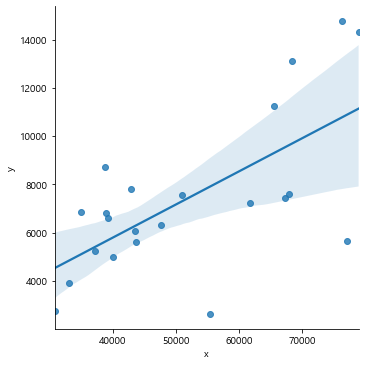

(0.6548882857670848, 0.0009413129557864012)

In [7]:
# 2021년의 조회수 합산과 거래량의 상관계수

x1 = year_sum_data['2021년도'] # 조회수
x1.index.name = '구'   
x2 = df2['2021년'].copy() # 거래량
x2.sort_index(inplace = True)

corr_frame =  pd.DataFrame({'x': x1, 'y' : x2})

q3 = corr_frame['x'].quantile(0.75) 
q1 = corr_frame['x'].quantile(0.25)
IQR = q3 - q1

corr_frame = corr_frame[(corr_frame['x'] > q1 - 1.5 * IQR) & (corr_frame['x'] < q3 + 1.5 * IQR)] 
x1 = corr_frame['x']
x2 = corr_frame['y']

plt.figure(figsize=(10,10))
sns.lmplot(x = 'x', y = 'y', data = corr_frame, ci = 95)
plt.show()

stats.pearsonr(x1, x2)  # (0.4116164120149343, 0.04091865423041306) # 이상치 제거 전 # p밸류 .04 # 총 조회수 -> 현실에서도 인기
                        # (0.6548882857670848, 0.0009413129557864012)  -> 이상치 제거(강동, 구로, 강서)

<Figure size 720x720 with 0 Axes>

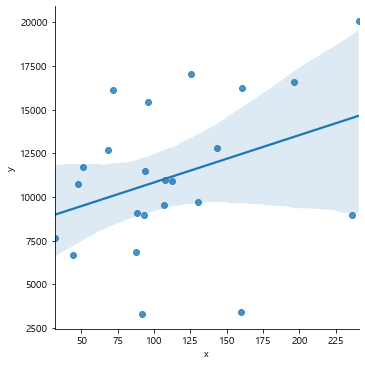

(0.35494944484434415, 0.09651817508032985)

In [8]:
# 2020년의 조회수 평균과 거래량의 상관계수

x1 = year_average_data['2020년도']
x1.index.name = '구'
x2 = df2['2020년'].copy()
x2.sort_index(inplace = True)

corr_frame =  pd.DataFrame({'x': x1, 'y' : x2})

q3 = corr_frame['x'].quantile(0.75) 
q1 = corr_frame['x'].quantile(0.25)
IQR = q3 - q1

corr_frame = corr_frame[(corr_frame['x'] > q1 - 1.5 * IQR) & (corr_frame['x'] < q3 + 1.5 * IQR)] 
x1 = corr_frame['x']
x2 = corr_frame['y']

plt.figure(figsize=(10,10))
sns.lmplot(x = 'x', y = 'y', data = corr_frame, ci = 95)
plt.show()


stats.pearsonr(x1, x2)         # (0.060450463199745216, 0.7740812608908041) 0에 가까운 상관계수 # # 평균 조회수 -> NOT (현실에서도 인기)
                                # (0.35494944484434415, 0.09651817508032985) # 이상치 제거...

<Figure size 720x720 with 0 Axes>

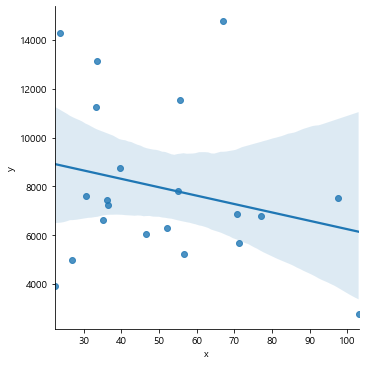

(-0.2424347838585333, 0.28966978189468834)

In [9]:
# 2021년의 조회수 평균과 거래량의 상관계수

x1 = year_average_data['2021년도']
x1.index.name = '구'
x2 = df2['2021년'].copy()
x2.sort_index(inplace = True)

corr_frame =  pd.DataFrame({'x': x1, 'y' : x2})

q3 = corr_frame['x'].quantile(0.75) 
q1 = corr_frame['x'].quantile(0.25)
IQR = q3 - q1

corr_frame = corr_frame[(corr_frame['x'] > q1 - 1.5 * IQR) & (corr_frame['x'] < q3 + 1.5 * IQR)] 
x1 = corr_frame['x']
x2 = corr_frame['y']

plt.figure(figsize=(10,10))
sns.lmplot(x = 'x', y = 'y', data = corr_frame, ci = 95)
plt.show()

stats.pearsonr(x1, x2)         # (-0.23488508223052215, 0.2583916422760082)  
                               # 오히려 평균 조회수 높을수록 -> 현실에서의 인기 낮음 : p-value 생각해보면 설득력은 떨어짐
                               # (-0.2424347838585333, 0.28966978189468834) -> 이상치제거 효과없음

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


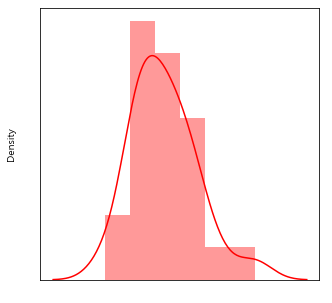

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


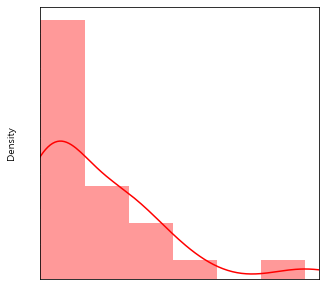

7

In [10]:
# 2020 ~ 2021 조회수 합과 거래량의 상관계수 # astype(np.int64) 
# copy['2020년'] += copy['2020.{}'.format(str(month).zfill(2))]

month_corr_list = []
for month in range(1, 13, 1):
    x1 = month_sum_data[float('2020.{}'.format(str(month).zfill(2)))]
    x1.index.name = '구'
    x2 = df2['2020.{}'.format(str(month).zfill(2))].copy()
    x2.sort_index(inplace = True)
    month_corr_list.append(stats.pearsonr(x1, x2))

for month in range(1, 13, 1):
    x1 = month_sum_data[float('2021.{}'.format(str(month).zfill(2)))]
    x1.index.name = '구'
    x2 = df2['2021.{}'.format(str(month).zfill(2))].copy()
    x2.sort_index(inplace = True)
    month_corr_list.append(stats.pearsonr(x1, x2))

    
corr_list = []
p_list = []
for corr, p in month_corr_list:
    corr_list.append(corr)
    p_list.append(p)
    
plt.figure(figsize=(5,5))
ax = sns.distplot(corr_list, kde = True, color = 'red')                # 월별 corr의 분포 
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.show()

plt.figure(figsize=(5,5))
ax = sns.distplot(p_list, kde = True, color = 'red')
ax.tick_params(axis='x', colors='white')                                # 월별 p의 분포 
ax.tick_params(axis='y', colors='white')
plt.xlim([0, 1]) 
plt.show()

array1 = (np.array(p_list) < 0.05)                                  # 실제로 p 밸류가 0.05보다 작은 값은 7개뿐, 17개는 0.05보다 크다.
np.count_nonzero(array1 == 1)                                   # 가치판단의 영역

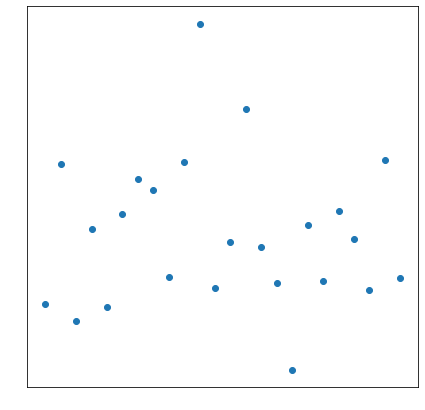

In [11]:
# 시간에 따라 상관계수가 늘어나냐? 를 보기 위핢
corr_list = pd.Series(data = corr_list, index = list(df.columns))
corr_list

plt.figure(figsize=(7,7))
ax = plt.scatter(corr_list.index, corr_list.values)
ax.axes.axes.tick_params(axis="y", colors="white")
plt.xticks([0, 11], labels=['2020', '2021'])
ax.axes.axes.tick_params(axis="x", colors="white")
plt.show()